Mejores parámetros encontrados: eps=0.45000000000000007, min_samples=4 con un Silhouette Score de 0.6366267270014074


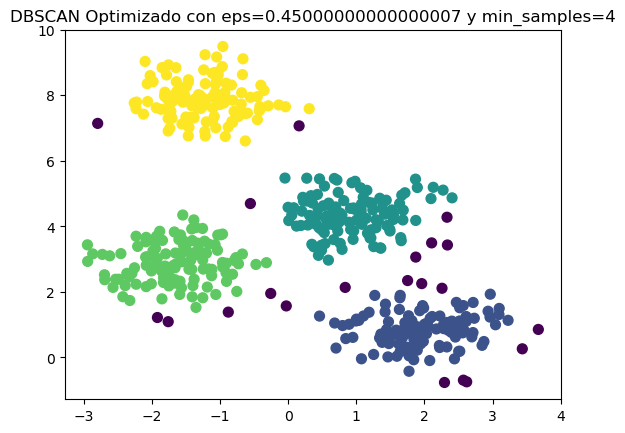

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Generar un conjunto de datos sintético
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

# Realizar Grid Search para encontrar los mejores parámetros
eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(3, 10)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

best_eps, best_min_samples = best_params
print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan_optimized = dbscan_optimized.fit_predict(X)

# Visualizar los resultados optimizados de DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan_optimized, cmap='viridis', s=50)
plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
plt.show()

c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


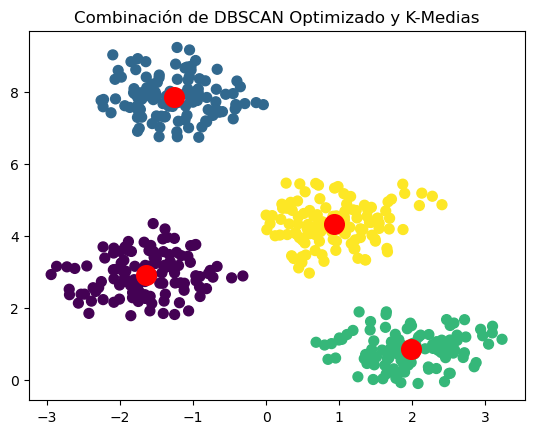

In [2]:
# Aplicar K-medias sobre los clusters detectados por DBSCAN
unique_labels = set(labels_dbscan_optimized)
core_samples_mask = np.zeros_like(labels_dbscan_optimized, dtype=bool)
core_samples_mask[dbscan_optimized.core_sample_indices_] = True
X_core = X[core_samples_mask]
kmeans = KMeans(n_clusters=len(unique_labels) - 1)  # Restar 1 por el ruido
labels_kmeans = kmeans.fit_predict(X_core)

# Visualizar los resultados finales combinados
plt.scatter(X_core[:, 0], X_core[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Combinación de DBSCAN Optimizado y K-Medias")
plt.show()

La optimización de parámetros en DBSCAN permitió identificar configuraciones que maximizan la separación de clusters, según la métrica de Silhouette Score. Al combinar los resultados de DBSCAN con K-medias, se lograron clusters más definidos, combinando la flexibilidad de DBSCAN para detectar formas arbitrarias con la precisión de K-medias para refinar los grupos dentro de regiones densas.
